In [7]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=3)
pl.rc('legend', fontsize=20)

%matplotlib inline

In [8]:
df = pd.read_hdf('../data/good.h5')

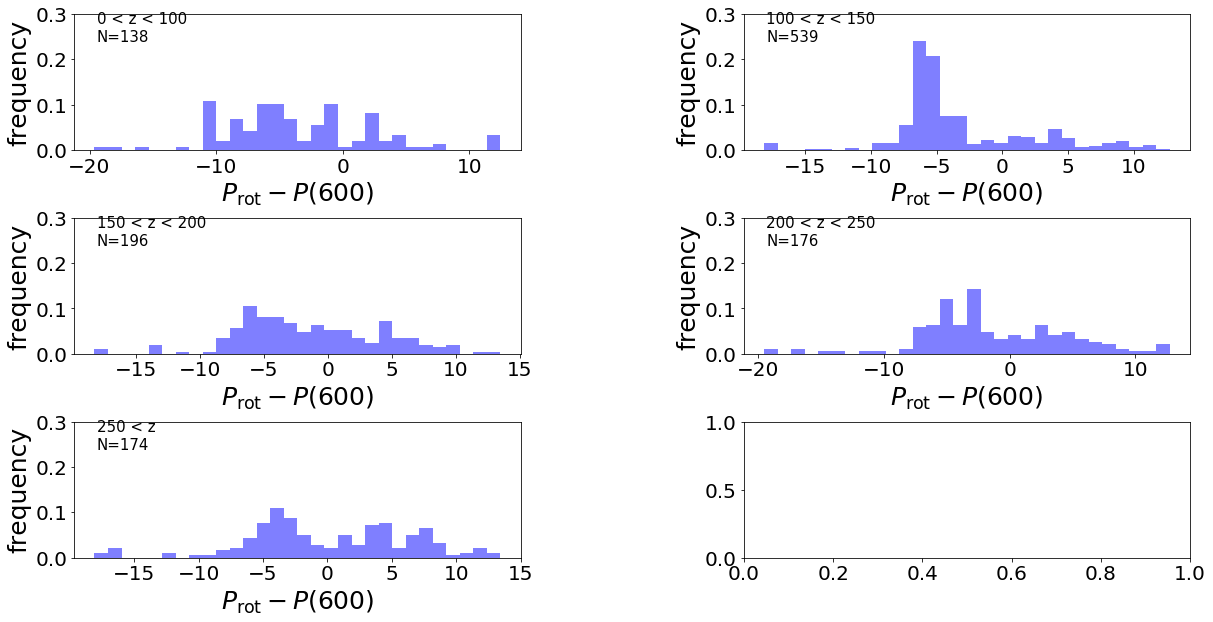

In [12]:
height = np.array([0, 100, 150, 200, 250, 500])
gyr_age = 600
gyrochrone = gyr.MM09e3(df['B_V'], gyr_age)
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 1.2) & (df['B_V'] < 1.4)
fig, axs = pl.subplots(3, 2, figsize=(20, 10))
axs = np.concatenate(axs)
pl.subplots_adjust(wspace=0.5, hspace=0.5)
#xs = np.concatenate(axs)
for i in range(1, len(height)):
    cut = (df['galcen_z'] > height[i-1]) & (df['galcen_z'] < height[i])
    mask = finite_age_mask & cut & color_mask
    perdiff = np.exp(df['logperiod_mean'][mask]) - gyrochrone[mask]
    if i == len(height)-1:
        axs[i-1].annotate("{0} < z \nN={1}".format(height[i-1], np.sum(mask)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    else:
        axs[i-1].annotate("{0} < z < {1}\nN={2}".format(height[i-1], height[i], np.sum(mask)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i-1].hist(perdiff, color='b', density=True, bins=30, alpha=0.5)
    axs[i-1].set_xlabel(r'$P_\mathrm{{rot}} - P({0})$'.format(gyr_age))
    axs[i-1].set_ylabel('frequency')
    axs[i-1].set_ylim(0, 0.3)
pl.savefig("heights.pdf")